In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
train = pd.read_csv('D:/kaggle/titanic/train.csv')
test = pd.read_csv('D:/kaggle/titanic/test.csv')

In [6]:
# See first 5 rows
train.head()

# Get summary info
train.info()  # Shows data types, missing values
train.describe()  # Shows statistics (mean, min, max)

# Check what we're predicting
train['Survived'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Survived
0    549
1    342
Name: count, dtype: int64

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


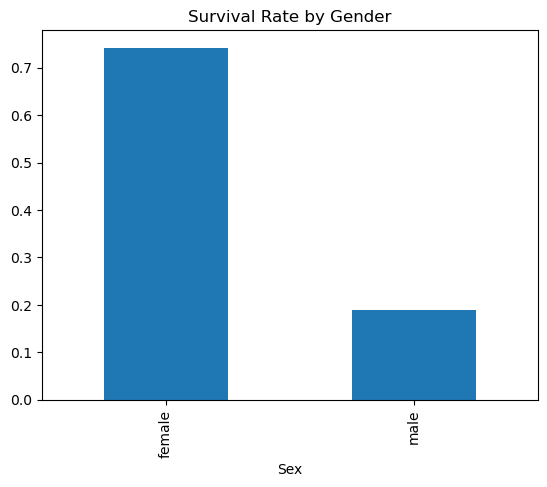

In [7]:
# Who survived more - men or women?
survival_by_sex = train.groupby('Sex')['Survived'].mean()
print(survival_by_sex)

# Visualize it
survival_by_sex.plot(kind='bar')
plt.title('Survival Rate by Gender')
plt.show()

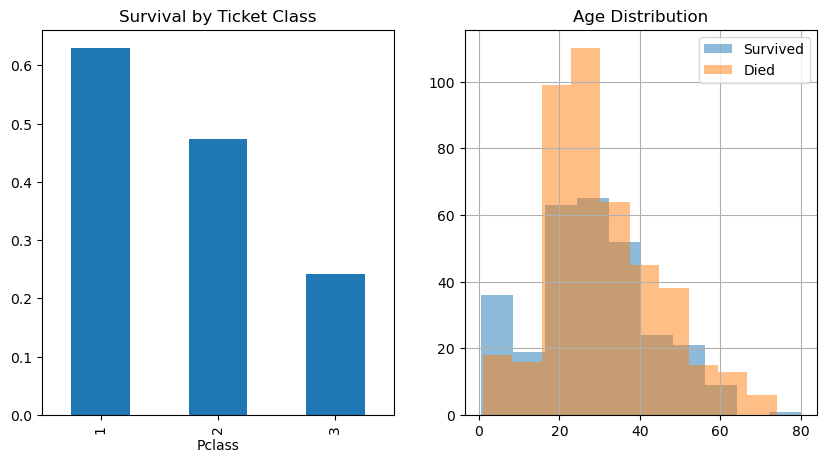

In [8]:
# Rich vs Poor survival
plt.figure(figsize=(10, 5))

# Survival by class
plt.subplot(1, 2, 1)
train.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.title('Survival by Ticket Class')

# Age distribution of survivors
plt.subplot(1, 2, 2)
train[train['Survived']==1]['Age'].hist(alpha=0.5, label='Survived')
train[train['Survived']==0]['Age'].hist(alpha=0.5, label='Died')
plt.legend()
plt.title('Age Distribution')
plt.show()

In [9]:
# Check missing values
print(train.isnull().sum())

# Fill missing ages with median (middle value)
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

# Fill missing embarked with mode (most common value)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Fill missing fare in test
test['Fare'].fillna(test['Fare'].median(), inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


C:\Users\nn\AppData\Local\Temp\ipykernel_11500\1831780543.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\nn\AppData\Local\Temp\ipykernel_11500\1831780543.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [10]:
# Create family size
for dataset in [train, test]:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = (dataset['FamilySize'] == 1).astype(int)

# Extract titles from names
for dataset in [train, test]:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Simplify titles
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in [train, test]:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 
                                                 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [11]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical to numerical
label = LabelEncoder()
train['Sex_Code'] = label.fit_transform(train['Sex'])
test['Sex_Code'] = label.transform(test['Sex'])

# Select features for model
features = ['Pclass', 'Sex_Code', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Title']

X_train = train[features]
y_train = train['Survived']
X_test = test[features]

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Create model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Test how good it is using cross-validation
scores = cross_val_score(rf, X_train, y_train, cv=5)
print(f"Average accuracy: {scores.mean():.4f}")

# Train on all data
rf.fit(X_train, y_train)

# Make predictions
predictions = rf.predict(X_test)

Average accuracy: 0.8193


In [13]:
# Create submission file
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predictions
})

submission.to_csv('titanic_submission.csv', index=False)
print("Submission file created!")

Submission file created!
